# Tutorial de Pytorch 4: MNIST

https://pytorch.org/tutorials/beginner/nn_tutorial.html

### **Dataset**

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Parámetros
batch_size = 64
num_epochs = 5
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformación para el dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Cargar el dataset MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Vamos a visualizar una de las imágenes del dataset MNIST.

Tensor (mini-batch) proveniente del DataLoader:  torch.Size([64, 1, 28, 28])
Tamaño de la imagen: torch.Size([1, 28, 28])
Etiqueta: tensor(7)


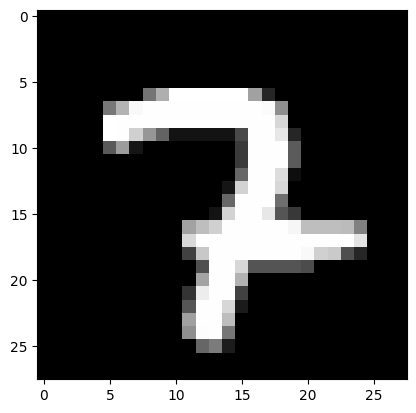

In [7]:
from matplotlib import pyplot
import numpy as np

print("Tensor (mini-batch) proveniente del DataLoader: ", next(iter(train_loader))[0].shape)

image, label = next(iter(train_loader))

pyplot.imshow(image[0].reshape((28, 28)), cmap="gray")
print("Tamaño de la imagen:", image[0].shape)
print("Etiqueta:", label[0])

### **Modelo**

Compondremos el modelo como una simple red neuronal feedforward con una sola capa oculta:

**Herencia de nn.Module**:

La clase Model hereda de nn.Module, que es la clase base para todos los módulos de redes neuronales en PyTorch. Esto proporciona funcionalidades como la gestión de parámetros y utilidades para el entrenamiento y la inferencia.


**Constructor __init__**:

Aquí es donde se definen las capas y operaciones que componen la red neuronal.

- self.fc1 = nn.Linear(input_size, hidden_size): Esta es la primera capa totalmente conectada (o "dense") que transforma la entrada de tamaño input_size a un vector de tamaño hidden_size.

- self.relu = nn.ReLU(): Esta es la función de activación ReLU (Rectified Linear Unit). Se utiliza para añadir no linealidad al modelo.

- self.fc2 = nn.Linear(hidden_size, num_classes): Esta es la segunda capa totalmente conectada que transforma el vector de tamaño hidden_size (salida de la capa oculta) a un vector de tamaño num_classes (probabilidades de las clases en la tarea de clasificación).

**Método forward**:

Este método define cómo se deben procesar las entradas (x) a través de las capas y operaciones definidas en el constructor.

- out = self.fc1(x): La entrada x se pasa a través de la primera capa totalmente conectada.

- out = self.relu(out): Luego, la salida de la primera capa pasa por la función de activación ReLU.

- out = self.fc2(out): Finalmente, la salida activada se pasa a través de la segunda capa totalmente conectada.
    
Al final del método forward, se devuelve la salida de la segunda capa totalmente conectada.

In [8]:
# Definición de la red neuronal
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

### **Entrenamiento**

In [9]:

# Instanciación del modelo, función de pérdida y optimizador
model = Model(28*28, 50, 10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Entrenamiento
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/938], Loss: 0.6474
Epoch [1/5], Step [200/938], Loss: 0.3294
Epoch [1/5], Step [300/938], Loss: 0.3347
Epoch [1/5], Step [400/938], Loss: 0.4023
Epoch [1/5], Step [500/938], Loss: 0.2950
Epoch [1/5], Step [600/938], Loss: 0.2578
Epoch [1/5], Step [700/938], Loss: 0.3363
Epoch [1/5], Step [800/938], Loss: 0.2230
Epoch [1/5], Step [900/938], Loss: 0.3976
Epoch [2/5], Step [100/938], Loss: 0.2263
Epoch [2/5], Step [200/938], Loss: 0.3251
Epoch [2/5], Step [300/938], Loss: 0.2840
Epoch [2/5], Step [400/938], Loss: 0.2660
Epoch [2/5], Step [500/938], Loss: 0.3651
Epoch [2/5], Step [600/938], Loss: 0.3809
Epoch [2/5], Step [700/938], Loss: 0.2726
Epoch [2/5], Step [800/938], Loss: 0.2008
Epoch [2/5], Step [900/938], Loss: 0.3138
Epoch [3/5], Step [100/938], Loss: 0.3711
Epoch [3/5], Step [200/938], Loss: 0.3098
Epoch [3/5], Step [300/938], Loss: 0.3544
Epoch [3/5], Step [400/938], Loss: 0.2417
Epoch [3/5], Step [500/938], Loss: 0.1082
Epoch [3/5], Step [600/938], Loss:

### **Evaluación**

In [10]:
# Test del modelo
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Accuracy of the model on the test images: 95.60%
